In [21]:

import pickle
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation import metrics
from neuralhydrology.nh_run import start_run, eval_run
import matplotlib.dates as mdates
import os
import numpy as np
area = 111639970.52

# Base directory containing the test results
cwd = Path(os.getcwd())
parent_wd = cwd.parent
run_dir1 = Path(parent_wd / 'runs/Zwalm_2402_173639')
base_dir1 = Path(parent_wd / 'runs/Zwalm_2402_173639/test')

run_dir2 = Path(parent_wd / 'runs/Zwalm_2402_175451')
base_dir2 = Path(parent_wd / 'runs/Zwalm_2402_175451/test')

run_dir3 = Path(parent_wd / 'runs/Zwalm_2402_181607')
base_dir3 = Path(parent_wd / 'runs/Zwalm_2402_181607/test')



Epoch 1: NSE = 0.1665
Epoch 2: NSE = 0.2397
Epoch 3: NSE = 0.2780
Epoch 4: NSE = 0.2996
Epoch 5: NSE = 0.3765
Epoch 6: NSE = 0.3791
Epoch 7: NSE = 0.4438
Epoch 8: NSE = 0.4232
Epoch 9: NSE = 0.4603
Epoch 10: NSE = 0.3973
Epoch 11: NSE = 0.4902
Epoch 12: NSE = 0.4228
Epoch 13: NSE = 0.4692
Epoch 14: NSE = 0.3933
Epoch 15: NSE = 0.4347
Epoch 16: NSE = 0.5153
Epoch 17: NSE = 0.4658
Epoch 18: NSE = 0.4527
Epoch 19: NSE = 0.4673
Epoch 20: NSE = 0.4691
Epoch 21: NSE = 0.4382
Epoch 22: NSE = 0.4433
Epoch 23: NSE = 0.4685
Epoch 24: NSE = 0.4473
Epoch 25: NSE = 0.4469
Epoch 26: NSE = 0.4501
Epoch 27: NSE = 0.4684
Epoch 28: NSE = 0.4405
Epoch 29: NSE = 0.4579
Epoch 30: NSE = 0.4629
Epoch 31: NSE = 0.4297
Epoch 32: NSE = 0.4409
Epoch 33: NSE = 0.4547
Epoch 34: NSE = 0.4532
Epoch 35: NSE = 0.4569
Epoch 36: NSE = 0.4646
Epoch 37: NSE = 0.4472
Epoch 38: NSE = 0.4285
Epoch 39: NSE = 0.4407
Epoch 40: NSE = 0.4507
Epoch 41: NSE = 0.4452
Epoch 42: NSE = 0.4378
Epoch 43: NSE = 0.4558
Epoch 44: NSE = 0.46

d:\Users\ddknop\Documents\envs\neuralhydrology\lib\site-packages\neuralhydrology\datautils\utils.py:340: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
d:\Users\ddknop\Documents\envs\neuralhydrology\lib\site-packages\neuralhydrology\datautils\utils.py:383: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


NSE: 0.452
MSE: 0.764
RMSE: 0.874
KGE: 0.557
Alpha-NSE: 0.884
Beta-KGE: 1.336
Beta-NSE: 0.256
Pearson-r: 0.735
FHV: -19.532
FMS: -28.983
FLV: 73.161
Peak-Timing: 1.455
Peak-MAPE: 61.024


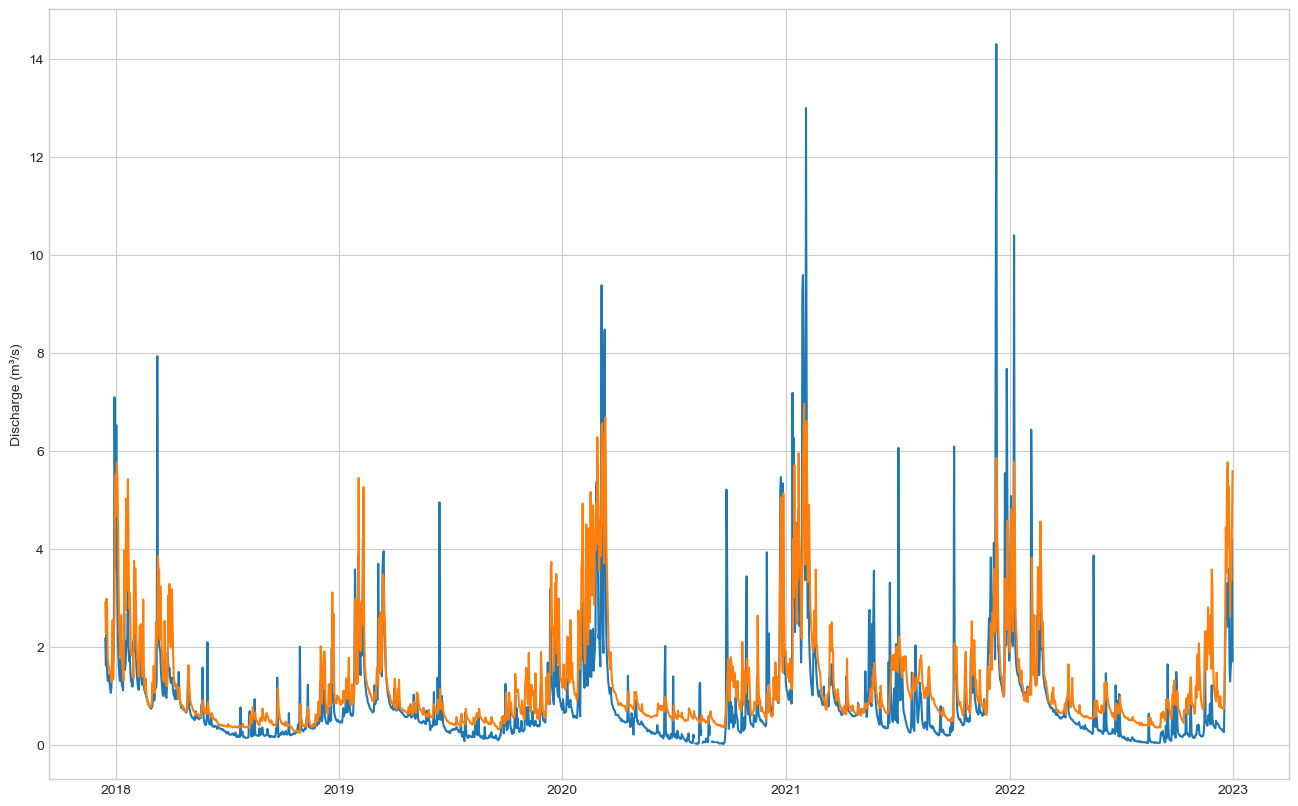

In [22]:

# Initialize variables to track the best NSE and the corresponding epoch
max_nse = -float('inf')  # Set to negative infinity initially
best_epoch = None

# Loop through epochs 1 to 50
for i in range(1, 51):  # Epochs 1 to 50
    # Format the folder name for the current epoch
    epoch_folder = base_dir1 / f"model_epoch{i:03d}"
    metrics_file = epoch_folder / "test_metrics.csv"

    # Check if the test_metrics.csv file exists
    if not metrics_file.exists():
        print(f"test_metrics.csv file not found for epoch {i}. Skipping...")
        continue

    # Load the CSV file into a DataFrame
    df = pd.read_csv(metrics_file)

    # Extract the NSE value from the dataframe (assuming NSE is in a column named 'NSE')
    if 'NSE' in df.columns:
        nse_value = df['NSE'].iloc[0]  
        print(f"Epoch {i}: NSE = {nse_value:.4f}")

        # Check if this is the highest NSE found so far
        if nse_value > max_nse:
            max_nse = nse_value
            best_epoch = i

# Output the best epoch and its NSE value
if best_epoch is not None:
    print(f"\nThe epoch with the highest NSE is Epoch {best_epoch} with an NSE value of {max_nse:.4f}")
else:
    print("No NSE values found.")


with open(run_dir1 / "test" / "model_epoch049" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)
qobs = results['6']['1D']['xr']['streamflow_obs']*area/(1000*3600*24)
qsim = results['6']['1D']['xr']['streamflow_sim']*area/(1000*3600*24)

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs['date'], qobs)
ax.plot(qsim['date'], qsim)
ax.set_ylabel("Discharge (m³/s)")

    #data properties

values = metrics.calculate_all_metrics(qobs.isel(time_step=-1), qsim.isel(time_step=-1))
for key, val in values.items():
    print(f"{key}: {val:.3f}")

Epoch 1: NSE = 0.1956
Epoch 2: NSE = 0.2325
Epoch 3: NSE = 0.2552
Epoch 4: NSE = 0.3354
Epoch 5: NSE = 0.3531
Epoch 6: NSE = 0.3918
Epoch 7: NSE = 0.3774
Epoch 8: NSE = 0.4086
Epoch 9: NSE = 0.4093
Epoch 10: NSE = 0.4601
Epoch 11: NSE = 0.4870
Epoch 12: NSE = 0.4595
Epoch 13: NSE = 0.4441
Epoch 14: NSE = 0.4539
Epoch 15: NSE = 0.4586
Epoch 16: NSE = 0.4714
Epoch 17: NSE = 0.4974
Epoch 18: NSE = 0.5024
Epoch 19: NSE = 0.4925
Epoch 20: NSE = 0.4624
Epoch 21: NSE = 0.4574
Epoch 22: NSE = 0.4504
Epoch 23: NSE = 0.4732
Epoch 24: NSE = 0.4612
Epoch 25: NSE = 0.4667
Epoch 26: NSE = 0.4908
Epoch 27: NSE = 0.4939
Epoch 28: NSE = 0.5128
Epoch 29: NSE = 0.4851
Epoch 30: NSE = 0.4881
Epoch 31: NSE = 0.4820
Epoch 32: NSE = 0.4919
Epoch 33: NSE = 0.5101
Epoch 34: NSE = 0.4876
Epoch 35: NSE = 0.4981
Epoch 36: NSE = 0.4844
Epoch 37: NSE = 0.5067
Epoch 38: NSE = 0.4836
Epoch 39: NSE = 0.4821
Epoch 40: NSE = 0.4752
Epoch 41: NSE = 0.4935
Epoch 42: NSE = 0.4859
Epoch 43: NSE = 0.4852
Epoch 44: NSE = 0.47

d:\Users\ddknop\Documents\envs\neuralhydrology\lib\site-packages\neuralhydrology\datautils\utils.py:340: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
d:\Users\ddknop\Documents\envs\neuralhydrology\lib\site-packages\neuralhydrology\datautils\utils.py:383: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


NSE: 0.506
MSE: 0.688
RMSE: 0.829
KGE: 0.612
Alpha-NSE: 0.855
Beta-KGE: 1.255
Beta-NSE: 0.195
Pearson-r: 0.746
FHV: -21.072
FMS: -25.467
FLV: 82.716
Peak-Timing: 1.636
Peak-MAPE: 65.011


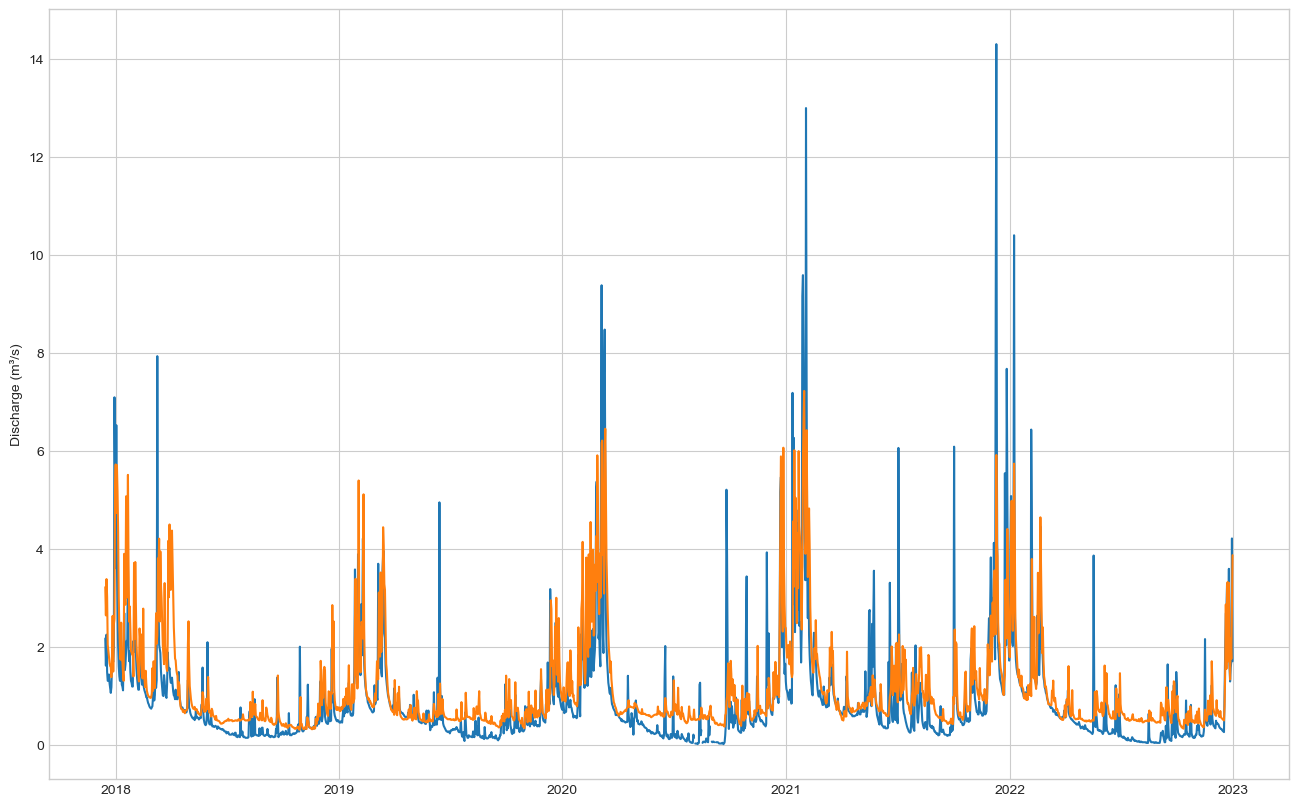

In [23]:

# Initialize variables to track the best NSE and the corresponding epoch
max_nse = -float('inf')  # Set to negative infinity initially
best_epoch = None

# Loop through epochs 1 to 50
for i in range(1, 51):  # Epochs 1 to 50
    # Format the folder name for the current epoch
    epoch_folder = base_dir2 / f"model_epoch{i:03d}"
    metrics_file = epoch_folder / "test_metrics.csv"

    # Check if the test_metrics.csv file exists
    if not metrics_file.exists():
        print(f"test_metrics.csv file not found for epoch {i}. Skipping...")
        continue

    # Load the CSV file into a DataFrame
    df = pd.read_csv(metrics_file)

    # Extract the NSE value from the dataframe (assuming NSE is in a column named 'NSE')
    if 'NSE' in df.columns:
        nse_value = df['NSE'].iloc[0]  
        print(f"Epoch {i}: NSE = {nse_value:.4f}")

        # Check if this is the highest NSE found so far
        if nse_value > max_nse:
            max_nse = nse_value
            best_epoch = i

# Output the best epoch and its NSE value
if best_epoch is not None:
    print(f"\nThe epoch with the highest NSE is Epoch {best_epoch} with an NSE value of {max_nse:.4f}")
else:
    print("No NSE values found.")


with open(run_dir2 / "test" / "model_epoch049" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)
qobs = results['6']['1D']['xr']['streamflow_obs']*area/(1000*3600*24)
qsim = results['6']['1D']['xr']['streamflow_sim']*area/(1000*3600*24)

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs['date'], qobs)
ax.plot(qsim['date'], qsim)
ax.set_ylabel("Discharge (m³/s)")

    #data properties

values = metrics.calculate_all_metrics(qobs.isel(time_step=-1), qsim.isel(time_step=-1))
for key, val in values.items():
    print(f"{key}: {val:.3f}")

Epoch 1: NSE = 0.1683
Epoch 2: NSE = 0.1864
Epoch 3: NSE = 0.2205
Epoch 4: NSE = 0.3162
Epoch 5: NSE = 0.2756
Epoch 6: NSE = 0.3859
Epoch 7: NSE = 0.4535
Epoch 8: NSE = 0.4004
Epoch 9: NSE = 0.4766
Epoch 10: NSE = 0.5119
Epoch 11: NSE = 0.5149
Epoch 12: NSE = 0.4981
Epoch 13: NSE = 0.4964
Epoch 14: NSE = 0.5007
Epoch 15: NSE = 0.5297
Epoch 16: NSE = 0.5145
Epoch 17: NSE = 0.5300
Epoch 18: NSE = 0.4980
Epoch 19: NSE = 0.4902
Epoch 20: NSE = 0.5199
Epoch 21: NSE = 0.5208
Epoch 22: NSE = 0.5068
Epoch 23: NSE = 0.5154
Epoch 24: NSE = 0.5221
Epoch 25: NSE = 0.5195
Epoch 26: NSE = 0.5192
Epoch 27: NSE = 0.5021
Epoch 28: NSE = 0.5184
Epoch 29: NSE = 0.5207
Epoch 30: NSE = 0.5183
Epoch 31: NSE = 0.5147
Epoch 32: NSE = 0.5231
Epoch 33: NSE = 0.5164
Epoch 34: NSE = 0.5252
Epoch 35: NSE = 0.5193
Epoch 36: NSE = 0.5216
Epoch 37: NSE = 0.5218
Epoch 38: NSE = 0.5258
Epoch 39: NSE = 0.5245
Epoch 40: NSE = 0.5170
Epoch 41: NSE = 0.5173
Epoch 42: NSE = 0.5177
Epoch 43: NSE = 0.5229
Epoch 44: NSE = 0.51

d:\Users\ddknop\Documents\envs\neuralhydrology\lib\site-packages\neuralhydrology\datautils\utils.py:340: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
d:\Users\ddknop\Documents\envs\neuralhydrology\lib\site-packages\neuralhydrology\datautils\utils.py:383: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


NSE: 0.531
MSE: 0.654
RMSE: 0.809
KGE: 0.616
Alpha-NSE: 0.783
Beta-KGE: 1.186
Beta-NSE: 0.142
Pearson-r: 0.743
FHV: -25.297
FMS: -31.955
FLV: 86.287
Peak-Timing: 1.545
Peak-MAPE: 64.876


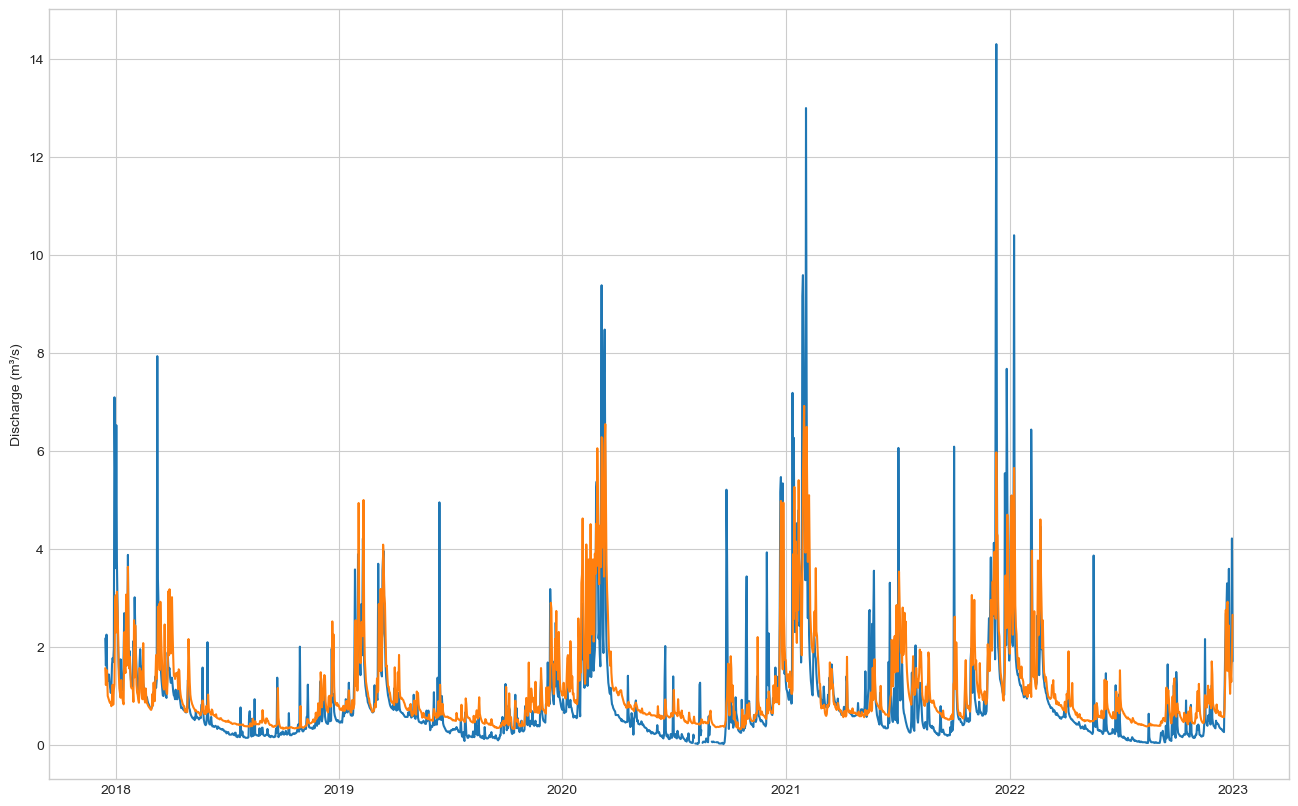

In [24]:

# Initialize variables to track the best NSE and the corresponding epoch
max_nse = -float('inf')  # Set to negative infinity initially
best_epoch = None

# Loop through epochs 1 to 50
for i in range(1, 51):  # Epochs 1 to 50
    # Format the folder name for the current epoch
    epoch_folder = base_dir3 / f"model_epoch{i:03d}"
    metrics_file = epoch_folder / "test_metrics.csv"

    # Check if the test_metrics.csv file exists
    if not metrics_file.exists():
        print(f"test_metrics.csv file not found for epoch {i}. Skipping...")
        continue

    # Load the CSV file into a DataFrame
    df = pd.read_csv(metrics_file)

    # Extract the NSE value from the dataframe (assuming NSE is in a column named 'NSE')
    if 'NSE' in df.columns:
        nse_value = df['NSE'].iloc[0]  
        print(f"Epoch {i}: NSE = {nse_value:.4f}")

        # Check if this is the highest NSE found so far
        if nse_value > max_nse:
            max_nse = nse_value
            best_epoch = i

# Output the best epoch and its NSE value
if best_epoch is not None:
    print(f"\nThe epoch with the highest NSE is Epoch {best_epoch} with an NSE value of {max_nse:.4f}")
else:
    print("No NSE values found.")


with open(run_dir3 / "test" / "model_epoch049" / "test_results.p", "rb") as fp:
    results = pickle.load(fp)
qobs = results['6']['1D']['xr']['streamflow_obs']*area/(1000*3600*24)
qsim = results['6']['1D']['xr']['streamflow_sim']*area/(1000*3600*24)

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(qobs['date'], qobs)
ax.plot(qsim['date'], qsim)
ax.set_ylabel("Discharge (m³/s)")

    #data properties

values = metrics.calculate_all_metrics(qobs.isel(time_step=-1), qsim.isel(time_step=-1))
for key, val in values.items():
    print(f"{key}: {val:.3f}")

In [25]:
def FHV(Qmod, Qobs, exceedance_prob=0.02):
    """
    Calculate the percentage bias in percent bias in flow duration curve high-segment volume (FHV) as defined in Yilmaz et al. (2008)

    Parameters
    ----------
    Qmod: numpy.array
        modelled flows
    Qobs: numpy.array
        observed flows
    exceedance_prob: float, default = 0.02
        highest fraction of flows to take into account for calculation of the bias
    Returns
    --------
    fhv: float
        percentage bias in percent bias in flow duration curve high-segment volume

    """
    nan_bool = np.isnan(Qobs)
    Qmod_nonan = Qmod[~nan_bool]
    Qobs_nonan = Qobs[~nan_bool]
    Q_mod_sorted = np.sort(Qmod_nonan)
    Q_obs_sorted = np.sort(Qobs_nonan)

    CDF_obs_distribution = ECDF(Q_obs_sorted)
    CDF_obs = CDF_obs_distribution(Q_obs_sorted)
    CDF_mod_distribution = ECDF(Q_mod_sorted)
    CDF_mod = CDF_mod_distribution(Q_mod_sorted)

    Q_obs_H = Q_obs_sorted[CDF_obs > 1 - exceedance_prob]
    Q_mod_H = Q_mod_sorted[CDF_mod > 1 - exceedance_prob]
    if len(Q_obs_H) != len(Q_mod_H):
        # occurs when e.g. modesl produces a constant input
        if len(Q_obs_H) < len(Q_mod_H):
            len_obs = len(Q_obs_H)
            Q_mod_H = Q_mod_H[0:len_obs]
        else: 
            len_mod = len(Q_mod_H)
            Q_obs_H = Q_obs_H[0:len_mod]
    fhv = 100 * np.nansum(Q_mod_H - Q_obs_H) / np.nansum(Q_obs_H)
    return fhv

In [26]:
print(qobs)
print(qsim)
qsim_avg = qsim.mean(skipna = True)
qobs_avg = qobs.mean(skipna=True)
print(qsim_avg)
print(qobs_avg)
qsim_avg.values/qobs_avg.values

<xarray.DataArray 'streamflow_obs' (date: 1843, time_step: 1)>
array([[2.17077704],
       [1.61516148],
       [2.248305  ],
       ...,
       [1.70561074],
       [4.21234148],
       [1.70561074]])
Coordinates:
  * date       (date) datetime64[ns] 2017-12-15 2017-12-16 ... 2022-12-31
  * time_step  (time_step) int64 0
<xarray.DataArray 'streamflow_sim' (date: 1843, time_step: 1)>
array([[1.564815  ],
       [1.22043333],
       [1.52824509],
       ...,
       [1.28428815],
       [1.82890481],
       [2.65338019]])
Coordinates:
  * date       (date) datetime64[ns] 2017-12-15 2017-12-16 ... 2022-12-31
  * time_step  (time_step) int64 0
<xarray.DataArray 'streamflow_sim' ()>
array(1.06664773)
<xarray.DataArray 'streamflow_obs' ()>
array(0.90099976)


1.1838490700900255

In [27]:
def NSE_LF(Qmod, Qobs):
    """
    Calculate the low-flow Nash-Sutcliffe Efficiency (NSE_LF) using inverse flows.
    This variant of NSE emphasizes performance during low-flow periods.

    Only calculates for timestamps where no NaN values are present in the observed flows.

    Parameters
    ----------
    Qmod: numpy.array
        Modelled flows
    Qobs: numpy.array
        Observed flows

    Returns
    -------
    nse_lf: float
        Low-flow Nash-Sutcliffe Efficiency

    """
    nan_bool = np.isnan(Qobs)
    Qmod_nonan = Qmod[~nan_bool]
    Qobs_nonan = Qobs[~nan_bool]

    # Avoid division by zero using epsilon (1/100th of mean observed flow)
    epsilon = np.mean(Qobs_nonan) / 100

    Qmod_inv = 1 / (Qmod_nonan + epsilon)
    Qobs_inv = 1 / (Qobs_nonan + epsilon)

    T = (Qobs_inv - Qmod_inv) ** 2
    N = (Qobs_inv - np.mean(Qobs_inv)) ** 2

    nse_lf = 1 - np.sum(T) / np.sum(N)
    return nse_lf

In [28]:
NSE_LF(qsim.values, qobs.values)

-0.0039245036220838525

In [29]:
from statsmodels.distributions.empirical_distribution import ECDF

fhv = FHV(qsim.values, qobs.values, exceedance_prob=0.02)
print(fhv)

-25.296842905871337


Vanaf hier ensemble

In [12]:
run_dir1 = Path(parent_wd / 'runs/Zwalm_2402_173639')
base_dir1 = Path(parent_wd / 'runs/Zwalm_2402_173639/test')

run_dir2 = Path(parent_wd / 'runs/Zwalm_2402_175451')
base_dir2 = Path(parent_wd / 'runs/Zwalm_2402_175451/test')

run_dir3 = Path(parent_wd / 'runs/Zwalm_2402_181607')
base_dir3 = Path(parent_wd / 'runs/Zwalm_2402_181607/test')

# Best epochs for each run directory
epochs = [16, 28, 49]

# Initialize an empty dictionary to hold the ensemble mean results
ensemble_mean = {}

# Loop through each run directory and corresponding epoch
for run_dir, epoch in zip([run_dir1, run_dir2, run_dir3], epochs):
    # Define the path to the results file for the specified epoch
    test_results_path = run_dir / "test" / f"model_epoch{epoch:03}" / "test_results.p"

    # Load the results from the pickle file
    with open(test_results_path, "rb") as fp:
        results = pickle.load(fp)

    # Extract observed and simulated streamflow data
    # Note: Adjust the basin id (here '6') and timestep ('1D') as needed
    qobs = results['6']['1D']['xr']['streamflow_obs'] * area / (1000 * 3600 * 24)
    qsim = results['6']['1D']['xr']['streamflow_sim'] * area / (1000 * 3600 * 24)

    # Store the simulations (this will be used to calculate the ensemble mean later)
    ensemble_mean[run_dir] = qsim

# Now calculate the ensemble mean across the different runs
# Assuming all simulations are aligned by basin and timestep
qsim_ensemble = np.mean(np.stack(list(ensemble_mean.values())), axis=0)

# To calculate NSE for the ensemble mean, first load the observed data (qobs)
# Assuming observed data is same for all runs, so you can just load it once from any of the runs
qobs = results['6']['1D']['xr']['streamflow_obs'] * area / (1000 * 3600 * 24)

# Define the NSE calculation function
def nse(simulated, observed):
    return 1 - np.sum((simulated - observed) ** 2) / np.sum((observed - np.mean(observed)) ** 2)

print(qsim_ensemble)
print(qobs)
# Calculate NSE for the ensemble mean
nse_ensemble = nse(qsim_ensemble, qobs)

print(f'Ensemble mean NSE: {nse_ensemble}')

[[2.50900728]
 [1.97226512]
 [2.47970349]
 ...
 [2.06753858]
 [2.85607062]
 [3.8494513 ]]
<xarray.DataArray 'streamflow_obs' (date: 1843, time_step: 1)>
array([[2.17077704],
       [1.61516148],
       [2.248305  ],
       ...,
       [1.70561074],
       [4.21234148],
       [1.70561074]])
Coordinates:
  * date       (date) datetime64[ns] 2017-12-15 2017-12-16 ... 2022-12-31
  * time_step  (time_step) int64 0
Ensemble mean NSE: <xarray.DataArray 'streamflow_obs' ()>
array(0.54572919)


In [13]:
print(len(qsim))
print(len(qobs))
print(qobs)

1843
1843
<xarray.DataArray 'streamflow_obs' (date: 1843, time_step: 1)>
array([[2.17077704],
       [1.61516148],
       [2.248305  ],
       ...,
       [1.70561074],
       [4.21234148],
       [1.70561074]])
Coordinates:
  * date       (date) datetime64[ns] 2017-12-15 2017-12-16 ... 2022-12-31
  * time_step  (time_step) int64 0


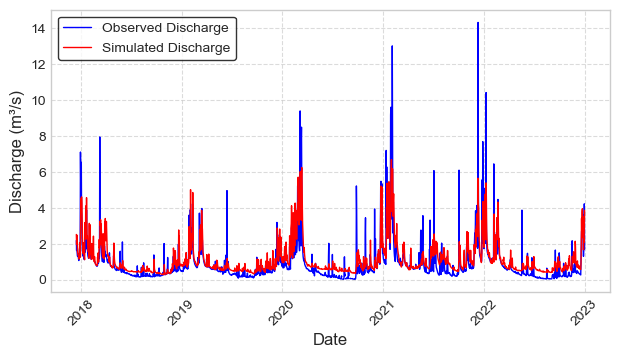

In [20]:
plt.figure(figsize=(6.3, 3.5))

# Plot observed streamflow
plt.plot(qobs['date'], qobs, label='Observed Discharge', color='blue', linewidth=1)

# Plot simulated streamflow
plt.plot(qobs['date'], qsim_ensemble, label='Simulated Discharge', color='red', linewidth = 1)

# Add axis labels and styling
plt.xlabel('Date', fontsize=12)
plt.ylabel('Discharge (m³/s)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xticks(rotation=45)
plt.style.use('seaborn-v0_8-whitegrid')

# Add legend
plt.legend(frameon=True, edgecolor='black')
plt.savefig("ensembleNSE_single basinplot.png", dpi=1000, bbox_inches='tight') 

plt.show()


In [15]:

qobs_isna = np.isnan(qobs.values)
qobs_isna_def = qobs.values[~qobs_isna]
qobs_mean =qobs_isna_def.mean()
print(qobs_mean)


qsim_ensemble_mean =qsim_ensemble.mean()
print(qsim_ensemble_mean)

qsim_ensemble_mean/qobs_mean

0.9009997627267535
1.0971286115528058


1.2176791348229603

In [16]:
def FHV(Qmod, Qobs, exceedance_prob=0.02):
    """
    Calculate the percentage bias in percent bias in flow duration curve high-segment volume (FHV) as defined in Yilmaz et al. (2008)

    Parameters
    ----------
    Qmod: numpy.array
        modelled flows
    Qobs: numpy.array
        observed flows
    exceedance_prob: float, default = 0.02
        highest fraction of flows to take into account for calculation of the bias
    Returns
    --------
    fhv: float
        percentage bias in percent bias in flow duration curve high-segment volume

    """
    nan_bool = np.isnan(Qobs)
    Qmod_nonan = Qmod[~nan_bool]
    Qobs_nonan = Qobs[~nan_bool]
    Q_mod_sorted = np.sort(Qmod_nonan)
    Q_obs_sorted = np.sort(Qobs_nonan)

    CDF_obs_distribution = ECDF(Q_obs_sorted)
    CDF_obs = CDF_obs_distribution(Q_obs_sorted)
    CDF_mod_distribution = ECDF(Q_mod_sorted)
    CDF_mod = CDF_mod_distribution(Q_mod_sorted)

    Q_obs_H = Q_obs_sorted[CDF_obs > 1 - exceedance_prob]
    Q_mod_H = Q_mod_sorted[CDF_mod > 1 - exceedance_prob]
    if len(Q_obs_H) != len(Q_mod_H):
        # occurs when e.g. modesl produces a constant input
        if len(Q_obs_H) < len(Q_mod_H):
            len_obs = len(Q_obs_H)
            Q_mod_H = Q_mod_H[0:len_obs]
        else: 
            len_mod = len(Q_mod_H)
            Q_obs_H = Q_obs_H[0:len_mod]
    fhv = 100 * np.nansum(Q_mod_H - Q_obs_H) / np.nansum(Q_obs_H)
    return fhv

In [17]:
from statsmodels.distributions.empirical_distribution import ECDF
qobs_def = qobs.values
print(qsim_ensemble)

fhv = FHV(qsim_ensemble, qobs_def, exceedance_prob=0.02)
print(fhv)

[[2.50900728]
 [1.97226512]
 [2.47970349]
 ...
 [2.06753858]
 [2.85607062]
 [3.8494513 ]]
-27.462928474098405


In [18]:
NSE_LF(qsim_ensemble, qobs_def)

-0.01847958749919032